In [5]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().resolve().parents[1] / "src"))

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from PyMBS.util import cpr2smm, smm2cpr

In [7]:
from PyMBS.prepay import PiecewiseLinearRegressor, MultivariatePiecewiseLinear

# Test PiecewiseLinearRegressor

In [9]:
X = np.linspace(0, 10, 200)
y = 2 + 1.5*X + 3*np.maximum(0, X-4) + np.random.randn(200)*0.2

reg = PiecewiseLinearRegressor(knots=[4, 7])
reg.fit(X, y)
pred = reg.predict(X)

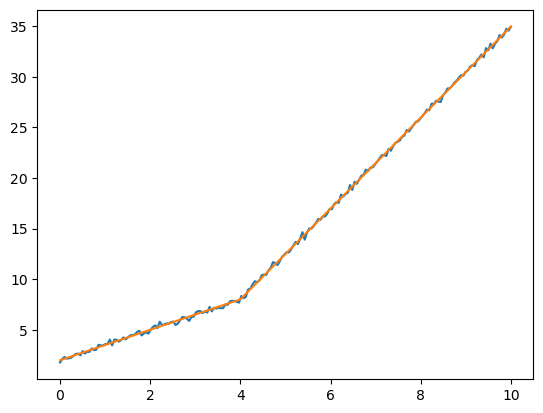

In [12]:
plt.plot(X, y)
plt.plot(X, pred)

# Test MultivariatePiecewiseLinear

In [16]:
# Data
rng = np.random.RandomState(0)
# Create grid
x1 = np.linspace(0, 10, 100)
x2 = np.linspace(0, 10, 100)
X1, X2 = np.meshgrid(x1, x2)

# true model
y = (
    1 + 
    1.2 * X1 + 2*np.maximum(0, X1 - 4) +
    0.8 * X2 + 1*np.maximum(0, X2 - 6) +
    rng.randn(100, 100)*0.1
)



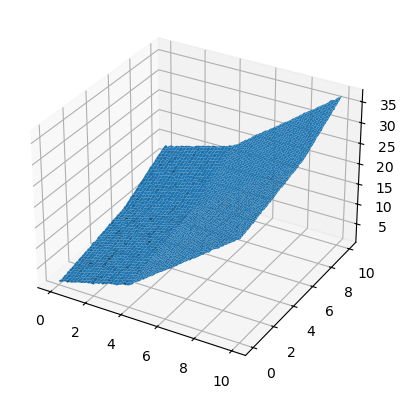

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, y)

plt.show()

In [25]:
# specify knots for each feature
knots = [
    [4, 7],     # feature 0 knots
    [3, 6]      # feature 1 knots
]

X = np.array([X1.reshape(10000), X2.reshape(10000)]).transpose()

model = MultivariatePiecewiseLinear(knots=knots)
model.fit(X, y.reshape(10000))
pred = model.predict(X)

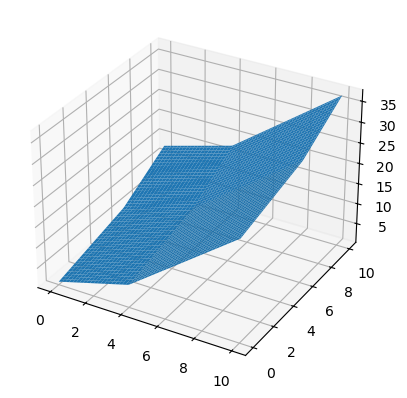

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, pred.reshape(100, 100))

plt.show()